In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math
import seaborn as sns

In [2]:
dataset=pd.read_csv("titanic.csv")

In [3]:
dataset.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1.0,1.0,"Anderson, Mr. Harry",male,48.0000,0.0,0.0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1.0,1.0,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1.0,0.0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1.0,0.0,"Andrews, Mr. Thomas Jr",male,39.0000,0.0,0.0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1.0,1.0,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2.0,0.0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1.0,0.0,"Artagaveytia, Mr. Ramon",male,71.0000,0.0,0.0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


In [5]:
len(dataset.index)

1310

In [6]:
dataset.describe

<bound method NDFrame.describe of       pclass  survived                                             name  \
0        1.0       1.0                    Allen, Miss. Elisabeth Walton   
1        1.0       1.0                   Allison, Master. Hudson Trevor   
2        1.0       0.0                     Allison, Miss. Helen Loraine   
3        1.0       0.0             Allison, Mr. Hudson Joshua Creighton   
4        1.0       0.0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)   
...      ...       ...                                              ...   
1305     3.0       0.0                            Zabour, Miss. Thamine   
1306     3.0       0.0                        Zakarian, Mr. Mapriededer   
1307     3.0       0.0                              Zakarian, Mr. Ortin   
1308     3.0       0.0                               Zimmerman, Mr. Leo   
1309     NaN       NaN                                              NaN   

         sex      age  sibsp  parch  ticket      fare    cabin em

## analyzing data

<AxesSubplot:xlabel='survived', ylabel='count'>

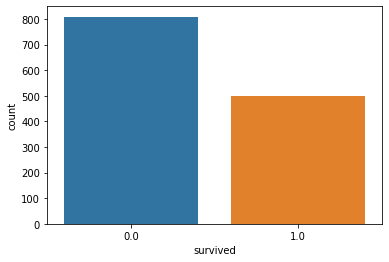

In [7]:
sns.countplot(x="survived",data=dataset)

<AxesSubplot:xlabel='survived', ylabel='count'>

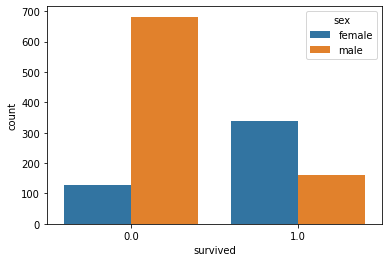

In [8]:
sns.countplot(x="survived",hue="sex",data=dataset)

<AxesSubplot:xlabel='survived', ylabel='count'>

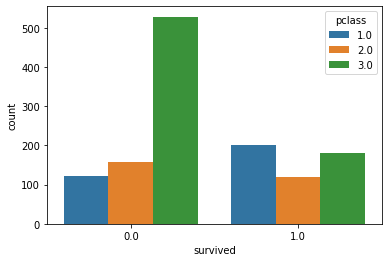

In [9]:
sns.countplot(x="survived",hue="pclass",data=dataset)

<AxesSubplot:ylabel='Frequency'>

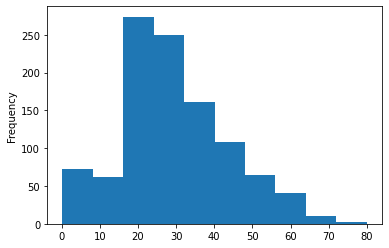

In [10]:
dataset["age"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

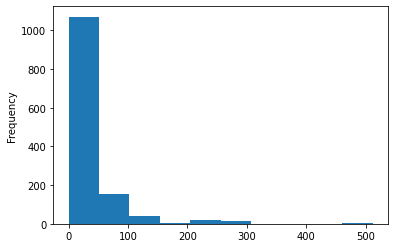

In [11]:
dataset["fare"].plot.hist()

<AxesSubplot:xlabel='sibsp', ylabel='count'>

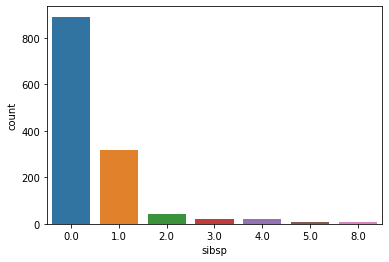

In [12]:
sns.countplot(x="sibsp",data=dataset)

## Data Wrangling

In [13]:
dataset.isnull()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False,True,True,False
3,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,False,False,False,False,True,False,False,False,False,True,False,True,True,True
1306,False,False,False,False,False,False,False,False,False,True,False,True,False,True
1307,False,False,False,False,False,False,False,False,False,True,False,True,True,True
1308,False,False,False,False,False,False,False,False,False,True,False,True,True,True


In [14]:
dataset.isnull().sum()

pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64

In [15]:
dataset.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1.0,1.0,"Anderson, Mr. Harry",male,48.0000,0.0,0.0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1.0,1.0,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1.0,0.0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1.0,0.0,"Andrews, Mr. Thomas Jr",male,39.0000,0.0,0.0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1.0,1.0,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2.0,0.0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1.0,0.0,"Artagaveytia, Mr. Ramon",male,71.0000,0.0,0.0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


In [16]:
dataset=dataset.drop(labels=1309,axis=0)

In [17]:
dataset.drop("cabin",axis=1,inplace=True)

In [18]:
dataset.describe

<bound method NDFrame.describe of       pclass  survived                                             name  \
0        1.0       1.0                    Allen, Miss. Elisabeth Walton   
1        1.0       1.0                   Allison, Master. Hudson Trevor   
2        1.0       0.0                     Allison, Miss. Helen Loraine   
3        1.0       0.0             Allison, Mr. Hudson Joshua Creighton   
4        1.0       0.0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)   
...      ...       ...                                              ...   
1304     3.0       0.0                             Zabour, Miss. Hileni   
1305     3.0       0.0                            Zabour, Miss. Thamine   
1306     3.0       0.0                        Zakarian, Mr. Mapriededer   
1307     3.0       0.0                              Zakarian, Mr. Ortin   
1308     3.0       0.0                               Zimmerman, Mr. Leo   

         sex      age  sibsp  parch  ticket      fare embarked bo

In [19]:
dataset.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [20]:
dataset.head(2)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,S,11,NaN,"Montreal, PQ / Chesterville, ON"


In [21]:
sex=pd.get_dummies(dataset["sex"])
sex.head(5)

,female,male
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0


In [22]:
sex=pd.get_dummies(dataset["sex"],drop_first=True)
sex.head(5)

,male
0,0
1,1
2,0
3,1
4,0


In [23]:
embark=pd.get_dummies(dataset["embarked"])
embark.head(5)

,C,Q,S
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [24]:
embark=pd.get_dummies(dataset["embarked"],drop_first=True)
embark.head(5)

,Q,S
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [25]:
pcl=pd.get_dummies(dataset["pclass"],drop_first=True)
pcl.head(5)

,2.0,3.0
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [26]:
dataset=pd.concat([dataset,sex,embark,pcl],axis=1)

In [27]:
dataset.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,boat,body,home.dest,male,Q,S,2.0,3.0
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,S,2,NaN,"St Louis, MO",0,0,1,0,0
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,S,11,NaN,"Montreal, PQ / Chesterville, ON",1,0,1,0,0
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0,0,1,0,0
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1,0,1,0,0
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0,0,1,0,0
5,1.0,1.0,"Anderson, Mr. Harry",male,48.0000,0.0,0.0,19952,26.5500,S,3,NaN,"New York, NY",1,0,1,0,0
6,1.0,1.0,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1.0,0.0,13502,77.9583,S,10,NaN,"Hudson, NY",0,0,1,0,0
7,1.0,0.0,"Andrews, Mr. Thomas Jr",male,39.0000,0.0,0.0,112050,0.0000,S,NaN,NaN,"Belfast, NI",1,0,1,0,0
8,1.0,1.0,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2.0,0.0,11769,51.4792,S,D,NaN,"Bayside, Queens, NY",0,0,1,0,0
9,1.0,0.0,"Artagaveytia, Mr. Ramon",male,71.0000,0.0,0.0,PC 17609,49.5042,C,NaN,22.0,"Montevideo, Uruguay",1,0,0,0,0


In [28]:
dataset.drop(["sex","embarked","pclass","name","ticket","boat","body","home.dest"],axis=1,inplace=True)

In [29]:
dataset.head(5)

,survived,age,sibsp,parch,fare,male,Q,S,2.0,3.0
0,1.0,29.0000,0.0,0.0,211.3375,0,0,1,0,0
1,1.0,0.9167,1.0,2.0,151.5500,1,0,1,0,0
2,0.0,2.0000,1.0,2.0,151.5500,0,0,1,0,0
3,0.0,30.0000,1.0,2.0,151.5500,1,0,1,0,0
4,0.0,25.0000,1.0,2.0,151.5500,0,0,1,0,0


In [30]:
dataset.describe

<bound method NDFrame.describe of       survived      age  sibsp  parch      fare  male  Q  S  2.0  3.0
0          1.0  29.0000    0.0    0.0  211.3375     0  0  1    0    0
1          1.0   0.9167    1.0    2.0  151.5500     1  0  1    0    0
2          0.0   2.0000    1.0    2.0  151.5500     0  0  1    0    0
3          0.0  30.0000    1.0    2.0  151.5500     1  0  1    0    0
4          0.0  25.0000    1.0    2.0  151.5500     0  0  1    0    0
...        ...      ...    ...    ...       ...   ... .. ..  ...  ...
1304       0.0  14.5000    1.0    0.0   14.4542     0  0  0    0    1
1305       0.0      NaN    1.0    0.0   14.4542     0  0  0    0    1
1306       0.0  26.5000    0.0    0.0    7.2250     1  0  0    0    1
1307       0.0  27.0000    0.0    0.0    7.2250     1  0  0    0    1
1308       0.0  29.0000    0.0    0.0    7.8750     1  0  1    0    1

[1309 rows x 10 columns]>

In [ ]:
data.to

In [31]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="median")
imputer.fit(dataset)

SimpleImputer(strategy='median')

In [32]:
imputer.statistics_

array([ 0.    , 28.    ,  0.    ,  0.    , 14.4542,  1.    ,  0.    ,
        1.    ,  0.    ,  1.    ])

In [33]:
k=imputer.transform(dataset)


In [34]:
dataset=pd.DataFrame(k,columns=dataset.columns)

In [35]:
dataset.describe

<bound method NDFrame.describe of       survived      age  sibsp  parch      fare  male    Q    S  2.0  3.0
0          1.0  29.0000    0.0    0.0  211.3375   0.0  0.0  1.0  0.0  0.0
1          1.0   0.9167    1.0    2.0  151.5500   1.0  0.0  1.0  0.0  0.0
2          0.0   2.0000    1.0    2.0  151.5500   0.0  0.0  1.0  0.0  0.0
3          0.0  30.0000    1.0    2.0  151.5500   1.0  0.0  1.0  0.0  0.0
4          0.0  25.0000    1.0    2.0  151.5500   0.0  0.0  1.0  0.0  0.0
...        ...      ...    ...    ...       ...   ...  ...  ...  ...  ...
1304       0.0  14.5000    1.0    0.0   14.4542   0.0  0.0  0.0  0.0  1.0
1305       0.0  28.0000    1.0    0.0   14.4542   0.0  0.0  0.0  0.0  1.0
1306       0.0  26.5000    0.0    0.0    7.2250   1.0  0.0  0.0  0.0  1.0
1307       0.0  27.0000    0.0    0.0    7.2250   1.0  0.0  0.0  0.0  1.0
1308       0.0  29.0000    0.0    0.0    7.8750   1.0  0.0  1.0  0.0  1.0

[1309 rows x 10 columns]>

## train data

In [36]:
x=dataset.drop("survived",axis=1)
y=dataset["survived"]

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
logmodel=LogisticRegression()

In [41]:
logmodel.fit(x_train,y_train)

c:\users\kukil\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [42]:
predictions=logmodel.predict(x_test)

In [43]:
from sklearn.metrics import classification_report

In [44]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n         0.0       0.81      0.87      0.84       236\n         1.0       0.78      0.69      0.73       157\n\n    accuracy                           0.80       393\n   macro avg       0.79      0.78      0.78       393\nweighted avg       0.80      0.80      0.79       393\n'

In [45]:
from sklearn.metrics import confusion_matrix

In [46]:
confusion_matrix(y_test,predictions)

array([[205,  31],
       [ 49, 108]], dtype=int64)

In [47]:
from sklearn.metrics import accuracy_score

In [48]:
accuracy_score(y_test,predictions)

0.7964376590330788